# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 1, 2017

SURVEY:
1) Python
2) Numpy/sklearn
3) IPython Notebooks

## Perceptron
### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $\hat{y} = sign(w.x + b)$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y - \hat{y}) * (w.x + b)$

LEARNING RULE: $w \leftarrow w + \eta * (y - \hat{y}) * x$

In [5]:
# Loading the required libraries

%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

import matplotlib
matplotlib.rc('text', usetex=True)

In [6]:
# Setting a random seed
numpy.random.seed(1234)

## 1. Data Preparation

In [7]:
# Sample dataset preparation

from sklearn.datasets import make_blobs
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

In [8]:
# Visualize data 
def vis_data(x, y, c='r'):
    plot.hold('on')
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')
    plot.title('giwengieb')
    plot.show()

<IPython.core.display.Javascript object>


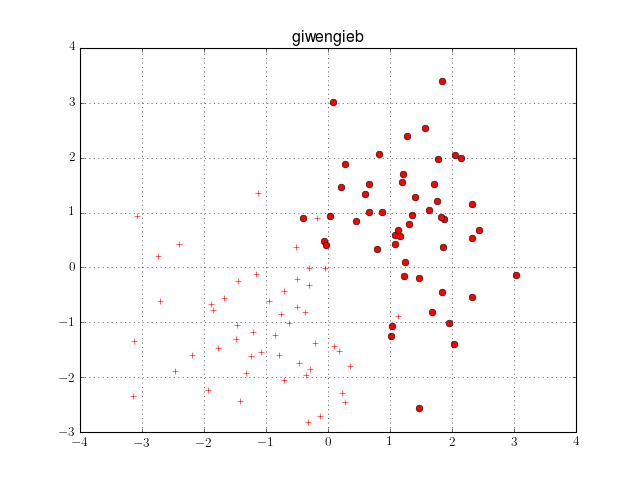

In [9]:
# Visualize TRAINING data
vis_data(x_train, y_train)

<IPython.core.display.Javascript object>


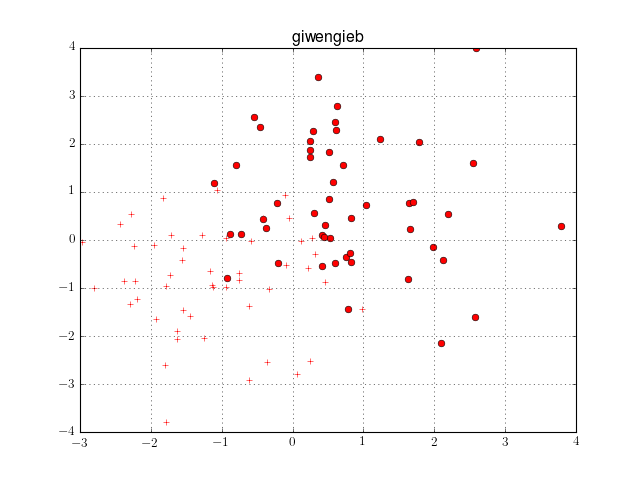

In [10]:
# Visualize TEST data
vis_data(x_test, y_test)

## 2. Model Definition

In [11]:
'''
Basic functionality of the perceptron model.

INPUT: Feature vector (x) and a weight vector (w)
OUTPUT: Returns the sign of w.x or the value of w.x
'''

def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [12]:
'''
Distance function for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Value of the distance for each data point or the average distance
'''

def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [13]:
'''
Learning rule for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Update direction for the weight vector
'''

def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y - y_)
    return dw

## 3. Learning Process

In [14]:
# Random initial weight vector
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

# Training Parameters
n_iter = 1000
eta = .1     # Learning rate
old_cost = numpy.Inf

# Training
for ni in range(n_iter):
    pred_y = perceptron(x_train, w)    # Dimension of 'pred_y'?
    
    w += eta * perceptron_rule(y_train, x_train, w)  # Updating the weight vector 
    
    cost = perceptron_dist(y_train, x_train, w, avg=True)
    
    print ('Perceptron cost {} after iteration {}'.format(cost, ni))
    
    if cost < 1e-16 or cost / old_cost >= 1.:
        print ('Converged')
        break
    old_cost = cost

Perceptron cost 1.5330415197370686 after iteration 0
Perceptron cost 1.3090478594677253 after iteration 1
Perceptron cost 1.0850945923652815 after iteration 2
Perceptron cost 0.8611986133525014 after iteration 3
Perceptron cost 0.6373170644744388 after iteration 4
Perceptron cost 0.41344801147544563 after iteration 5
Perceptron cost 0.18957895847645237 after iteration 6
Perceptron cost 0.0006634085294515777 after iteration 7
Perceptron cost 0.00023788349119447963 after iteration 8
Perceptron cost 0.00018371781612395514 after iteration 9
Perceptron cost 0.00014528083823074268 after iteration 10
Perceptron cost 0.00015042073381775565 after iteration 11
Converged


In [15]:
print ('Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)))
print ('Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))

Initial: 0.9 x_1 + 0.75 x_2 + 0.0 = 0
Final: -0.017 x_1 + -0.01 x_2 + 0.003 = 0


## 4. Visualize Final Model

In [16]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


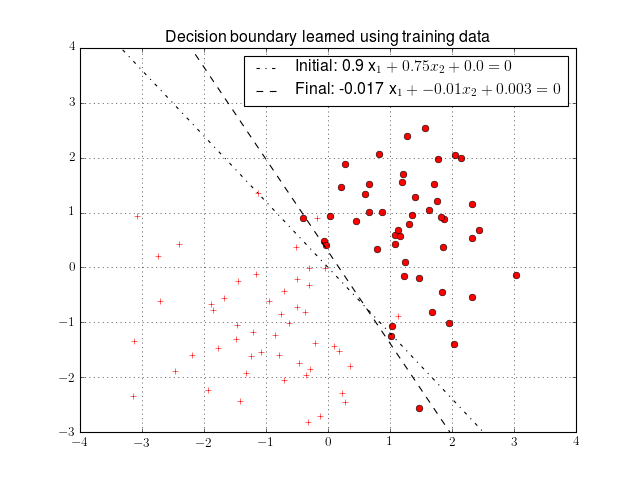

/Users/alperenkaraoglu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [17]:
# Decision boundary learned using training data

plot.figure()

vis_data(x_train, y_train)

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary learned using training data')
plot.show()

## 5. Testing

<IPython.core.display.Javascript object>


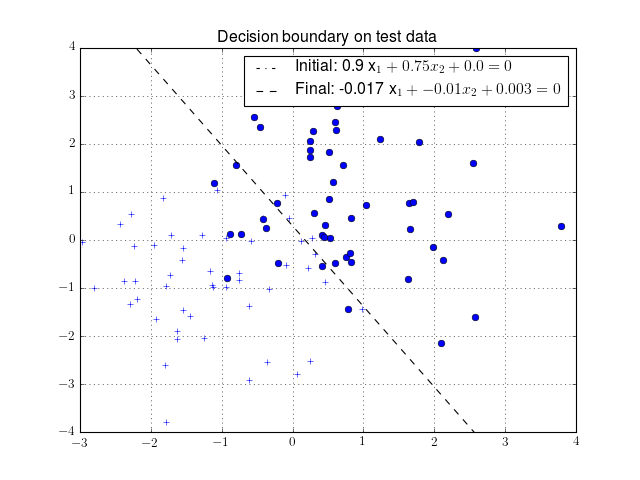

/Users/alperenkaraoglu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [18]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [19]:
train_error = numpy.sum(numpy.abs(perceptron(x_train, w) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(perceptron(x_test, w) - y_test)) / numpy.float(len(y_test))

print ('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.04, Test error rate 0.13


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [42]:
# Use this cell to import required packages of sklearn
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


In [43]:
# STEP 1: Create a Perceptron class instance

perceptron = Perceptron(alpha = 0, eta0 = 0.1)

In [44]:
# STEP 2: Fit the perceptron model to the training data

perceptron.fit(x_train, y_train)

Perceptron(alpha=0, class_weight=None, eta0=0.1, fit_intercept=True, n_iter=5,
      n_jobs=1, penalty=None, random_state=0, shuffle=True, verbose=0,
      warm_start=False)

In [45]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)

print ('Final: %.2f x_1 + x_2 %.2f = 0' % (perceptron.coef_[0][0], perceptron.coef_[0][1]))

Final: -0.43 x_1 + x_2 -0.21 = 0


In [46]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.

#In this case the results provided by sklearn and the custom model differ by a lot which means the sklearn model picked
#a different subset of variables.
print ('sklearn: %.2f x_1 + x_2 %.2f = 0' % (perceptron.coef_[0][0], perceptron.coef_[0][1]))
print ('Custom: {:.2} x_1 + x_2 {:.2} = 0'.format(*list(w)))

sklearn: -0.43 x_1 + x_2 -0.21 = 0
Custom: -0.017 x_1 + x_2 -0.01 = 0


In [47]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
train_pred = perceptron.predict(x_train)
test_pred = perceptron.predict(x_test)

print ("Training Accuracy: ", accuracy_score(y_train, train_pred))
print ("Test Accuracy: ", accuracy_score(y_test, test_pred))

Training Accuracy:  0.94
Test Accuracy:  0.86
